# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_results_complete = pd.merge( study_results, mouse_metadata, how = "left", on = ["Mouse ID", "Mouse ID"] )

# Display the data table for preview
study_results_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [35]:
# Checking the number of mice.
number_of_mice = study_results_complete["Mouse ID"].nunique()
number_of_mice

249

In [36]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = study_results_complete[study_results_complete.duplicated(subset = ["Mouse ID", "Timepoint"], keep=False)]
dup_mice_ID = dup_mice["Mouse ID"].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_results_complete.drop_duplicates(subset="Mouse ID", keep = "first")
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [45]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = study_results_complete["Mouse ID"].nunique()
number_of_mice
number_of_mice_2 = clean_df["Mouse ID"].nunique()
number_of_mice_2
print("Number of unique Mouse IDs in the original DataFrame:", number_of_mice)
print("Number of unique Mouse IDs in the cleaned DataFrame:", number_of_mice_2)

Number of unique Mouse IDs in the original DataFrame: 249
Number of unique Mouse IDs in the cleaned DataFrame: 249


## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_drug_regimen = study_results_complete.groupby("Drug Regimen")
regimen_mean = grouped_drug_regimen["Tumor Volume (mm3)"].mean()
regimen_median = grouped_drug_regimen["Tumor Volume (mm3)"].median()
regimen_variance = grouped_drug_regimen["Tumor Volume (mm3)"].var()
regimen_std_dev = grouped_drug_regimen["Tumor Volume (mm3)"].std()
regimen_sem = grouped_drug_regimen["Tumor Volume (mm3)"].sem()
regimen_summary = pd.merge(regimen_mean,regimen_median, on="Drug Regimen", how = "inner")
regimen_summary = pd.merge(regimen_summary,regimen_variance, on="Drug Regimen", how = "inner")



In [99]:
regimen_summary_2 = pd.merge(regimen_std_dev,regimen_sem, on="Drug Regimen", how = "inner")

regimen_summary_final = pd.merge(regimen_summary,regimen_summary_2, on="Drug Regimen", how = "inner")
regimen_summary_final.rename(columns={'Tumor Volume (mm3)_x_x': 'Mean',
                      'Tumor Volume (mm3)_y_x': 'Median',
                      'Tumor Volume (mm3)': 'Variance',
                        'Tumor Volume (mm3)_x_y': 'std',
                      'Tumor Volume (mm3)_y_y': 'sem'
                      },
                      )

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_drug_regimen = study_results_complete.groupby("Drug Regimen")
regimen_summary = grouped_drug_regimen["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
regimen_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

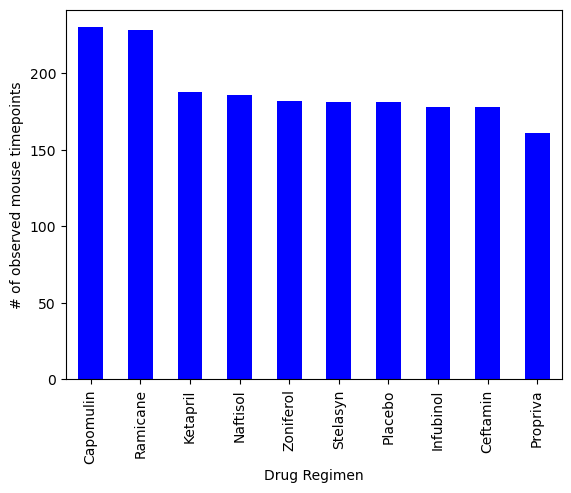

In [104]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_plot = study_results_complete["Drug Regimen"].value_counts()
drug_regimen_plot.plot(kind="bar", color="blue")

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timepoints")
plt.show()

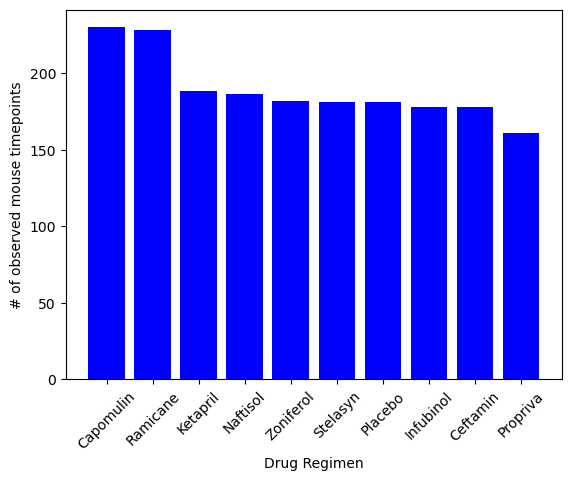

In [108]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_plot.index, drug_regimen_plot.values, color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timepoints")
plt.xticks(rotation=45)
plt.show()


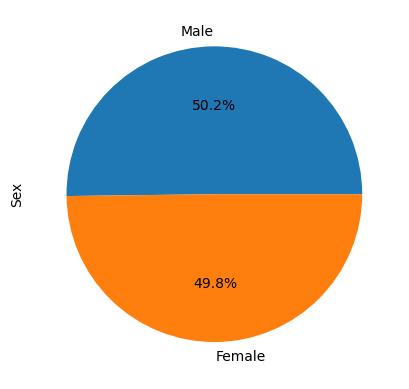

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_df["Sex"].value_counts()

sex_distribution.plot(kind="pie",autopct="%1.1f%%")
plt.show()

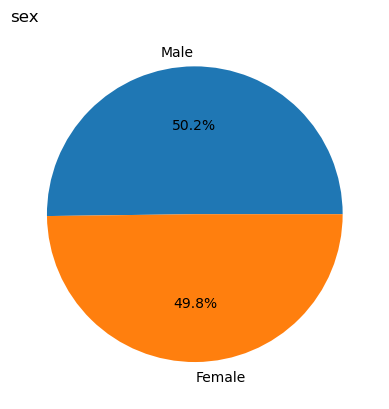

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%')
plt.title("sex", loc="left")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


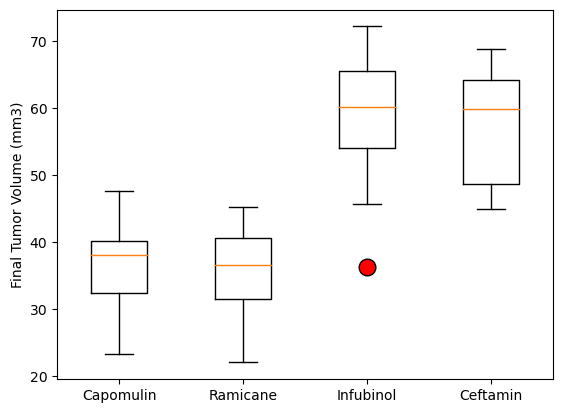

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

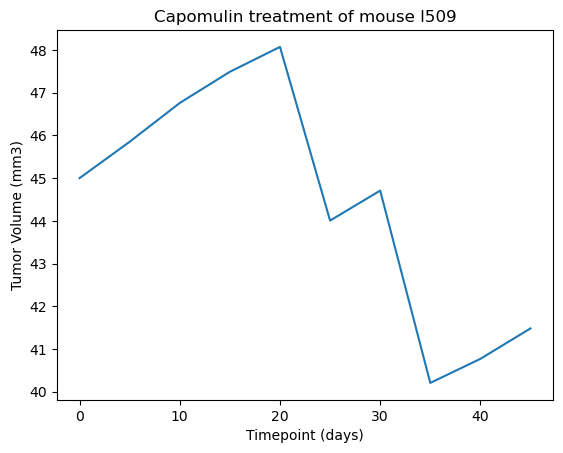

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


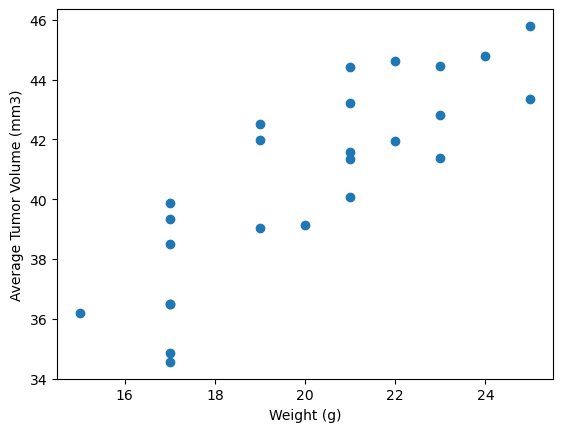

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


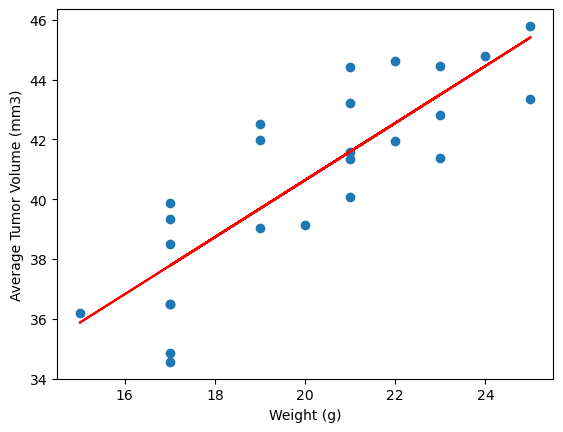

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
